In [1]:
import geopandas as gpd
import numpy as np
import pandas as pd
import json
import pickle
import os
import seaborn as sns
from shapely.geometry import LineString
from shapely import geometry
import math
# import contextily as ctx
from statsmodels.regression.linear_model import WLS, OLS
from scipy.stats import spearmanr, kruskal, mannwhitneyu, ttest_ind, pearsonr
from sklearn.linear_model import LinearRegression
from mpl_toolkits.axes_grid1 import make_axes_locatable
import statsmodels.api as sm
from matplotlib import pyplot as plt
from statsmodels.formula.api import ols, wls, glm
from statsmodels.stats.mediation import Mediation
import warnings
from scipy.stats import ttest_1samp
warnings.filterwarnings('ignore')
def m(x, w):
    """Weighted Mean"""
    return np.sum(x * w) / np.sum(w)
def cov(x, y, w):
    """Weighted Covariance"""
    return np.sum(w * (x - m(x, w)) * (y - m(y, w))) / np.sum(w)
def corr(x, y, w):
    """Weighted Correlation"""
    return cov(x, y, w) / np.sqrt(cov(x, x, w) * cov(y, y, w)) 

city_name_dict = {'chicago':'Chicago', 'phoenix': 'Phoenix', 'houston': 'Houston', 'newyork': 'New York', 'la': 'Los Angeles', 'philadelphia': 'Philadelphia',
                  'dc': 'Washington DC', 'boston': 'Boston', 'atlanta': 'Atlanta', 'dallas': 'Dallas', 'sf': 'San Francisco', 'baltimore': 'Baltimore',
                  'sanantonio': 'San Antonio', 'sanjose': 'San Jose', 'sandiego': 'San Diego', 'seattle': 'Seattle', 'miami': 'Miami',
                 'charlotte': 'Charlotte', 'cleveland': 'Cleveland', 'denver': 'Denver', 'elpaso': 'El Paso', 'fortworth': 'Fort Worth',
                 'jacksonville': 'Jacksonville', 'portland': 'Portland', 'detroit': 'Detroit', 'austin': 'Austin', 'columbus': 'Columbus',
                 'ind': 'Indianapolis', 'okc': 'Oklahoma City'}
city_full = {'chicago':'Chicago, IL', 'phoenix': 'Phoenix, AZ', 'houston': 'Houston, TX', 'newyork': 'New York, NY', 'la': 'Los Angeles, CA', 'philadelphia': 'Philadelphia, PA',
            'dc': 'Washington, DC', 'boston': 'Boston, MA', 'atlanta': 'Atlanta, GA', 'dallas': 'Dallas, TX', 'sf': 'San Francisco, CA', 'baltimore': 'Baltimore, MD',
            'sanantonio': 'San Antonio, TX', 'sanjose': 'San Jose, CA', 'sandiego': 'San Diego, CA', 'seattle': 'Seattle, WA', 'miami': 'Miami, FL',
            'charlotte': 'Charlotte, NC', 'cleveland': 'Cleveland, OH', 'denver': 'Denver, CO', 'elpaso': 'El Paso, TX', 'fortworth': 'Fort Worth, TX',
            'jacksonville': 'Jacksonville, FL', 'portland': 'Portland, OR', 'detroit': 'Detroit, MI', 'austin': 'Austin, TX', 'columbus': 'Columbus, OH',
            'ind': 'Indianapolis, IN', 'okc': 'Oklahoma City, OK'}

In [6]:
dasffasd = pd.read_csv('E://Inequality_spring/process_data/cbg_mediation_230814.csv')

In [7]:
city_feats = pd.read_csv('data/nyc_features.csv')
city_feats1 = pd.merge(city_feats, dasffasd[['census_block_group', 'Race']], how = 'left', on = 'census_block_group')
city_feats1.to_csv('data/nyc_features.csv', index = False)

In [4]:
cbg_feats = pd.read_csv('../cbg_features.csv')
with open('../process_data/city_cbgs_dict.pkl', 'rb') as f:
    city_cbgs_dict = pickle.load(f)

In [6]:
with open('../process_data/CBG_pairwise/CBG_reachability_3cities_1127.pkl', 'rb') as f:
    results = pickle.load(f)
with open('../process_data/behaviour_data/accessible_job_3cities_1127.pkl', 'rb') as f:
    job_dict = pickle.load(f)
with open('../process_data/behaviour_data/accessible_poi_3cities_1127.pkl', 'rb') as f:
    poi_dict = pickle.load(f)
with open('../process_data/behaviour_data/gyration_radius_2019_3to5_3cities.pkl', 'rb') as f:
    gdict = pickle.load(f)
gyr_dict_50 = gdict[50]
gyr_dict = gdict[100]
gyr_dict_200 = gdict[200]

In [7]:
# newyork 公屋
city = 'newyork'
curr_gpd = gpd.read_file('../places_shapefile/city_geojson/'+city+'.geojson')

# Figure 3

In [11]:
seg_df = pd.read_csv('../process_data/behaviour_data/visit_segregation_index_newyork_1127.csv')
city_feats = pd.read_csv('data/nyc_features.csv')
seg_df = pd.merge(seg_df, city_feats[['census_block_group', 'Total population', 'income_percentile', 'Race']], on = 'census_block_group', how = 'left')

In [24]:
# 2023.1.4 新的equitable transit
for thres in range(10, 101, 5):
    seg_df['real_KL_'+str(thres)] = [np.sum(rel_entr(decipher(P), Q)) for P in seg_df['real_distribution_'+str(thres)]]
    seg_df['visit_KL_'+str(thres)] = [np.sum(rel_entr(decipher(P), Q)) for P in seg_df['visit_distribution_'+str(thres)]]
    seg_df['visit_equity_KL_'+str(thres)] = [np.sum(rel_entr(decipher(P), Q)) for P in seg_df['visit_equal_distribution_'+str(thres)]]
    seg_df['equity_KL_'+str(thres)] = [np.sum(rel_entr(decipher(P), Q)) for P in seg_df['equal_distribution_new_'+str(thres)]]
    seg_df['shuffled_KL_'+str(thres)] = [np.sum(rel_entr(decipher(P), Q)) for P in seg_df['shuffled_distribution_'+str(thres)]]
    seg_df['real_KL_ring_'+str(thres)] = [np.sum(rel_entr(decipher(P), Q)) for P in seg_df['real_distribution_ring_'+str(thres)]]
    seg_df['visit_KL_ring_'+str(thres)] = [np.sum(rel_entr(decipher(P), Q)) for P in seg_df['visit_distribution_ring_'+str(thres)]]
    seg_df['visit_equity_KL_ring_'+str(thres)] = [np.sum(rel_entr(decipher(P), Q)) for P in seg_df['visit_equal_distribution_ring_'+str(thres)]]
    seg_df['equity_KL_ring_'+str(thres)] = [np.sum(rel_entr(decipher(P), Q)) for P in seg_df['equal_distribution_ring_'+str(thres)]]
    seg_df['shuffled_KL_ring_'+str(thres)] = [np.sum(rel_entr(decipher(P), Q)) for P in seg_df['shuffled_distribution_ring_'+str(thres)]]
    seg_df['KL_ratio_'+str(thres)] = 1- seg_df['equity_KL_'+str(thres)] / seg_df['real_KL_'+str(thres)]

In [15]:
from scipy.special import rel_entr
def racial_seg(avg):
    white_avg, black_avg, Hispanic_avg, others_avg = avg
    return (np.abs(white_avg-1/4)+np.abs(black_avg-1/4)+np.abs(Hispanic_avg-1/4)+np.abs(others_avg-1/4))*2/3
def decipher(x):
    return [float(y) for y in x.strip('()').split(',')]
def get_percentile(x, df, feat):
    return df[df[feat] < x].shape[0] / df.shape[0]
def diversity(x, race):
    if race == 'white':
        return 1-x[0]
    if race == 'black':
        return 1-x[1]
    if race == 'Hispanic':
        return 1-x[2]
    return 1-x[3]
def calc_racial_composition(city_feats, cbgs):
    temp = city_feats[city_feats.census_block_group.isin(cbgs)]
    if np.sum(temp['Total population']) == 0:
        return np.nan, np.nan, np.nan, np.nan
    white_avg = np.average(temp.non_Hispanic_white_ratio, weights = temp['Total population'])
    black_avg = np.average(temp.non_Hispanic_black_ratio, weights = temp['Total population'])
    Hispanic_avg = np.average(temp.Hispanic_ratio, weights = temp['Total population'])
    return white_avg, black_avg, Hispanic_avg, 1-white_avg-black_avg-Hispanic_avg
Q = (0.3226007223834873,
 0.22209321016253628,
 0.29047687710970965,
 0.16482919034426685)

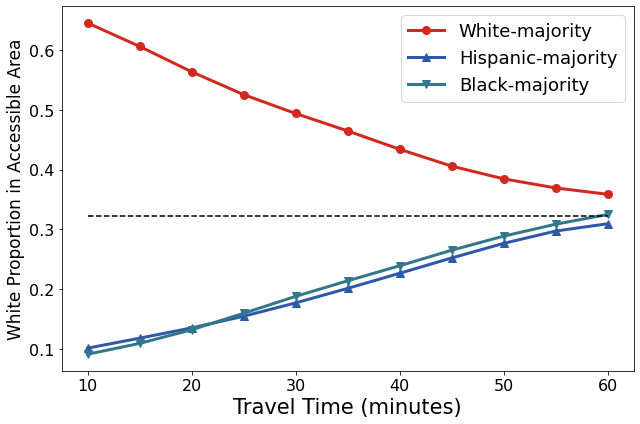

In [16]:
vthres = 0.6
focus_race = 'white'
temp = seg_df[seg_df.vehicle_rate <= vthres]
ds = list(range(10, 61, 5))
pls_white = []
pls_black = []
pls_hisp = []
for d in ds:
    temp['temp'] = temp['real_distribution_'+str(d)].apply(decipher)
    temp['white'] = temp['temp'].apply(lambda x: x[0])
    temp['black'] = temp['temp'].apply(lambda x: x[1])
    temp['hisp'] = temp['temp'].apply(lambda x: x[2])
    ttemp = temp[temp.Race == 'white']
    pls_white.append(np.average(ttemp[focus_race], weights = ttemp['Total population']))
    ttemp = temp[temp.Race == 'Hispanic']
    pls_hisp.append(np.average(ttemp[focus_race], weights = ttemp['Total population']))
    ttemp = temp[temp.Race == 'black']
    pls_black.append(np.average(ttemp[focus_race], weights = ttemp['Total population']))  
fig = plt.figure(figsize = (9, 6))
colors = ['#D12920', '#2E59A7', '#32788A']
plt.plot(ds, pls_white, color = '#D12920', lw = 3, marker = 'o', markersize = 8, label = 'White-majority')
plt.plot(ds, pls_hisp, color = '#2E59A7', lw = 3, marker = '^', markersize = 8, label = 'Hispanic-majority')
plt.plot(ds, pls_black, color = '#32788A', lw = 3, marker = 'v', markersize = 8, label = 'Black-majority')
plt.xlabel('Travel Time (minutes)', size = 21)
plt.ylabel('White Proportion in Accessible Area', size = 17)
plt.xticks(size = 16)
plt.yticks(size = 16)
plt.hlines(Q[0], 10, 60, ls = '--', color = 'black')
# plt.yticks([0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35], ['0%', '5%', '10%', '15%', '20%', '25%', '30%', '35%'], size = 16)
plt.legend(fontsize = 18)
# plt.ylim(0, 0.35)
plt.tight_layout()
plt.show()

In [41]:
np.average(temp[temp.Race == 'white']['real_KL_'+str(d)], weights = temp[temp.Race == 'white']['Total population'])

0.3507553548811312

In [52]:
vthres = 0.6
temp = seg_df[seg_df.vehicle_rate <= vthres]
ds = list(range(10, 61, 5))
white_seg = []
white_low = []
white_high = []
black_seg = []
black_low = []
black_high = []
Hispanic_seg = []
Hispanic_low = []
Hispanic_high = []
for d in ds:
    ttemp_A = temp[temp.Race == 'white']
    white_seg.append(np.average(ttemp_A['real_KL_'+str(d)], weights = ttemp_A['Total population']))
    bstrap_result = []
    for k in range(1000):
        bstrap_result.append(ttemp_A['real_KL_'+str(d)].sample(n = ttemp_A.shape[0], replace = True, weights = ttemp_A['Total population']).mean())
    white_low.append(np.percentile(bstrap_result, 2.5))
    white_high.append(np.percentile(bstrap_result, 97.5))
    ttemp_A = temp[temp.Race == 'black']
    black_seg.append(np.average(ttemp_A['real_KL_'+str(d)], weights = ttemp_A['Total population']))
    bstrap_result = []
    for k in range(1000):
        bstrap_result.append(ttemp_A['real_KL_'+str(d)].sample(n = ttemp_A.shape[0], replace = True, weights = ttemp_A['Total population']).mean())
    black_low.append(np.percentile(bstrap_result, 2.5))
    black_high.append(np.percentile(bstrap_result, 97.5))
    ttemp_A = temp[temp.Race == 'Hispanic']
    Hispanic_seg.append(np.average(ttemp_A['real_KL_'+str(d)], weights = ttemp_A['Total population']))
    bstrap_result = []
    for k in range(1000):
        bstrap_result.append(ttemp_A['real_KL_'+str(d)].sample(n = ttemp_A.shape[0], replace = True, weights = ttemp_A['Total population']).mean())
    Hispanic_low.append(np.percentile(bstrap_result, 2.5))
    Hispanic_high.append(np.percentile(bstrap_result, 97.5))

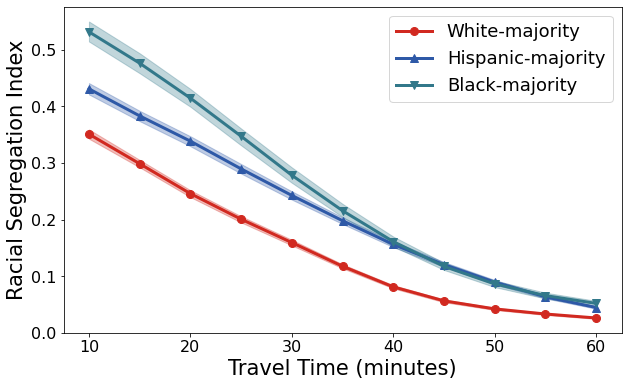

In [54]:
fig = plt.figure(figsize = (10, 6))
colors = ['#D12920', '#2E59A7', '#32788A']
plt.plot(ds, white_seg, color = '#D12920', lw = 3, marker = 'o', markersize = 8, label = 'White-majority')
plt.plot(ds, Hispanic_seg, color = '#2E59A7', lw = 3, marker = '^', markersize = 8, label = 'Hispanic-majority')
plt.plot(ds, black_seg, color = '#32788A', lw = 3, marker = 'v', markersize = 8, label = 'Black-majority')
plt.fill_between(ds, white_low, white_high, color = '#D12920', alpha = 0.3)    
plt.fill_between(ds, Hispanic_low, Hispanic_high, color = '#2E59A7', alpha = 0.3)    
plt.fill_between(ds, black_low, black_high, color = '#32788A', alpha = 0.3)
plt.xlabel('Travel Time (minutes)', size = 21)
plt.ylabel('Racial Segregation Index', size = 21)
plt.xticks(size = 16)
plt.yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5], size = 16)
plt.legend(fontsize = 18)
plt.ylim(0, None)
plt.show()

In [101]:
cnames = ['census_block_group']
for d in ds:
    cnames.append('real_KL_'+str(d))
for d in ds:
    cnames.append('equity_KL_'+str(d))

In [102]:
city_feats = pd.read_csv('data/nyc_features.csv')
city_feats1 = pd.merge(city_feats, seg_df[cnames], how = 'left', on = 'census_block_group')
city_feats1.to_csv('data/nyc_features.csv', index = False)

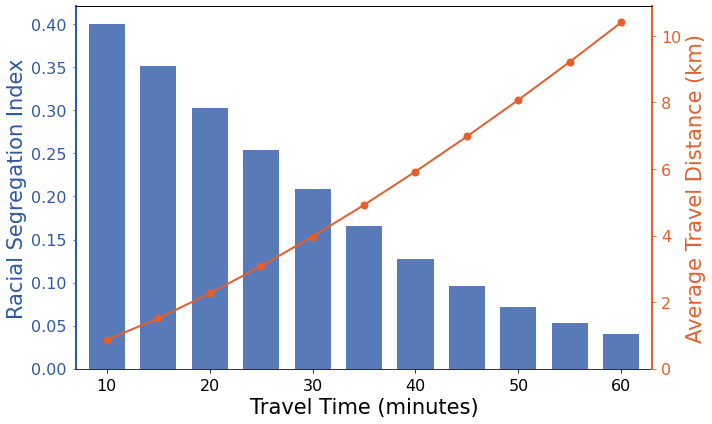

In [73]:
vthres = 0.6
temp = seg_df[seg_df.vehicle_rate <= vthres]
ds = list(range(10, 61, 5))
segs = []
for d in ds:
    ttemp = temp.dropna(subset = ['real_KL_'+str(d), 'Total population'])
    segs.append(np.average(ttemp['real_KL_'+str(d)], weights = ttemp['Total population']))
charac_dists = [ 0.8625723 ,  1.51555109,  2.26069127,  3.08283798,  3.97206484,
        4.92125074,  5.92498161,  6.97897112,  8.07972259,  9.2243169 ,
       10.41027204]
color1 = '#2E59A7'
color2 = '#E45F2B'
fig = plt.figure(figsize = (10, 6))
plt.style.use('seaborn-paper')
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()
ax1.spines['left'].set(color = color1, linewidth = 2)
ax2.spines['left'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.spines['right'].set(color = color2, linewidth = 2)
ds = list(range(10, 61, 5))
ax1.bar(ds, segs, width = 3.5, hatch = None, color = color1, label = 'Public Transit', alpha = 0.8)
ax1.set_xlim(7, 63)
# ax1.legend(fontsize = 16)
ax1.set_ylabel('Racial Segregation Index', size = 21, color = color1)
ax1.tick_params(axis = 'y', labelsize = 16, color = color1, labelcolor = color1)
ax1.tick_params(axis = 'x', labelsize = 16)
ax1.set_xlabel('Travel Time (minutes)', size = 21)
ax2.plot(ds, charac_dists, color = color2, lw = 2, marker = 'o', markersize = 8)
ax2.set_ylabel('Average Travel Distance (km)', size = 21, color = color2)
ax2.tick_params(axis ='y', labelsize = 16, color = color2, labelcolor = color2)
ax2.set_ylim(0, None)
plt.tight_layout()
plt.show()

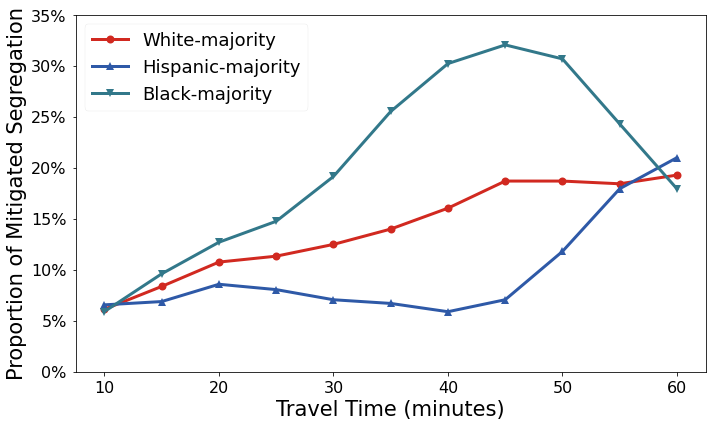

In [93]:
vthres = 0.6
temp = seg_df[seg_df.vehicle_rate <= vthres]
ds = list(range(10, 61, 5))
white_portion = []
black_portion = []
Hispanic_portion = []
for d in ds:
    ttemp_A = temp[temp.Race == 'white']
    white_portion.append(1 - np.average(ttemp_A['equity_KL_'+str(d)], weights = ttemp_A['Total population']) / np.average(ttemp_A['real_KL_'+str(d)], weights = ttemp_A['Total population']))
    ttemp_A = temp[temp.Race == 'black']
    black_portion.append(1 - np.average(ttemp_A['equity_KL_'+str(d)], weights = ttemp_A['Total population']) / np.average(ttemp_A['real_KL_'+str(d)], weights = ttemp_A['Total population']))
    ttemp_A = temp[temp.Race == 'Hispanic']
    Hispanic_portion.append(1 - np.average(ttemp_A['equity_KL_'+str(d)], weights = ttemp_A['Total population']) / np.average(ttemp_A['real_KL_'+str(d)], weights = ttemp_A['Total population']))
fig = plt.figure(figsize = (10, 6))
colors = ['#D12920', '#2E59A7', '#32788A']
plt.plot(ds, white_portion, color = '#D12920', lw = 3, marker = 'o', markersize = 8, label = 'White-majority')
plt.plot(ds, Hispanic_portion, color = '#2E59A7', lw = 3, marker = '^', markersize = 8, label = 'Hispanic-majority')
plt.plot(ds, black_portion, color = '#32788A', lw = 3, marker = 'v', markersize = 8, label = 'Black-majority')
plt.xlabel('Travel Time (minutes)', size = 21)
plt.ylabel('Proportion of Mitigated Segregation', size = 21)
plt.xticks(size = 16)
plt.yticks([0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35], ['0%', '5%', '10%', '15%', '20%', '25%', '30%', '35%'], size = 16)
plt.legend(fontsize = 18)
plt.ylim(0, 0.35)
plt.tight_layout()
plt.show()

# Figure 1A

In [114]:
cities = []
pops = []
vs = []
ts = []
for city in city_cbgs_dict:
    temp = cbg_feats[cbg_feats.census_block_group.isin(city_cbgs_dict[city])]
    temp = temp.dropna(subset = ['vehicle_rate', 'public_transit_ratio'])
    cities.append(city)
    pops.append(np.sum(temp['Total population']))
    ts.append(np.sum(temp['Total population']*temp['public_transit_ratio'])/np.sum(temp['Total population']))
    vs.append(np.sum(temp['Households total']*temp['vehicle_rate'])/np.sum(temp['Households total']))

In [122]:
draw_df = pd.DataFrame({'City': cities, 'Population': pops, 'Car': vs, 'Transit': ts})
draw_df['log_pop'] = np.log10(draw_df.Population)
# draw_df['log_Car'] = np.log10(draw_df.Car)
# draw_df['log_Transit'] = np.log10(draw_df.Transit)

In [126]:
draw_df.to_csv('data/city_vechile_transit.csv', index = False)

In [123]:
centers = []
transits = []
cars = []
y1s = []
y2s = []
y1s_car = []
y2s_car = []
csize = []
step = -0.2
wind = 0.6
for i in np.arange(7.2, 5.1, step): 
    temp = draw_df[(draw_df.log_pop > i-wind) & (draw_df.log_pop <= i)]
    if temp.shape[0] == 0:
        continue
    csize.append(temp.shape[0])
    centers.append(i - wind/2)
    transits.append(np.mean(temp['Transit']))
    cars.append(np.mean(temp['Car']))
    
    bstrap_result = []
    for k in range(1000):
        bstrap_result.append(temp['Transit'].sample(n = temp.shape[0], replace = True).mean())
    low, high = np.percentile(bstrap_result, [2.5, 97.5])
    low, high = np.percentile(bstrap_result, [0.5, 99.5])
    y1s.append(low)
    y2s.append(high)
    
    bstrap_result = []
    for k in range(1000):
        bstrap_result.append(temp['Car'].sample(n = temp.shape[0], replace = True).mean())
    low, high = np.percentile(bstrap_result, [2.5, 97.5])
    low, high = np.percentile(bstrap_result, [0.5, 99.5])
    y1s_car.append(low)
    y2s_car.append(high)

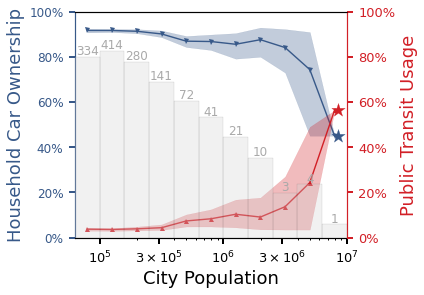

In [124]:
fig = plt.figure(figsize = (6, 4.2))
plt.style.use('seaborn-paper')
color1 = "#385989"
color2 = "#D22027"
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()
ax3 = ax1.twinx()
ax3.bar(centers, height = np.log10(csize)+0.2, width = 0.2, edgecolor = 'black', color = 'lightgray', alpha = 0.3, zorder = 1.1)
for i,j in zip(centers, csize):
    ax3.text(i, np.log10(j)+0.23, str(j), ha = 'center', color = 'darkgray', size = 12)
ax3.set_ylim(0, 3.4)
ax1.plot(centers, cars, marker = 'v', color = color1, markersize = 5)
ax1.fill_between(centers, y1s_car, y2s_car, color = color1, alpha = 0.3)
ax2.plot(centers, transits, marker = '^', color = color2, markersize = 5)
ax2.fill_between(centers, y1s, y2s, color = color2, alpha = 0.3)
scatters = draw_df.iloc[[0]]
ax1.scatter(scatters['log_pop'], scatters['Car'], color = color1, s = 200, marker = '*')
ax2.scatter(scatters['log_pop'], scatters['Transit'], color = color2, s = 200, marker = '*')
ax1.set_ylabel('Household Car Ownership', fontsize = 18, color = color1)
ax1.tick_params(axis = 'y', length = 6, width = 2, color = color1, labelcolor = color1, labelsize = 12)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set(color = color1, linewidth = 1.2)
ax1.spines['bottom'].set(linewidth = 1.2)
ax1.spines['top'].set(linewidth = 1.2)
ax1.set_ylim(0, 1)
ax1.set_xticks([5, np.log10(3e5), 6, np.log10(3e6), 7])
ax1.set_xticklabels([r'$10^5$', r'$3\times10^5$', r'$10^6$', r'$3\times10^6$', r'$10^7$'])
#ax1.set_xticks([np.log10(2e5), np.log10(5e5), np.log10(4e5), np.log10(6e5), np.log10(7e5), np.log10(8e5), np.log10(9e5), np.log10(2e6), np.log10(5e6), np.log10(4e6), np.log10(6e6), np.log10(7e6), np.log10(8e6), np.log10(9e6)], minor = True)
ax1.set_xticks([np.log10(2e5), np.log10(5e5), np.log10(4e5), np.log10(6e5), np.log10(7e5), np.log10(8e5), np.log10(9e5), np.log10(2e6), np.log10(5e6), np.log10(4e6), np.log10(6e6), np.log10(7e6), np.log10(8e6), np.log10(9e6)], minor = True)
ax2.set_ylabel('Public Transit Usage', fontsize = 18, color = color2)
ax2.tick_params(axis = 'y', which='major', length = 6, width = 2, color = color2, labelcolor = color2, labelsize = 13)
ax2.tick_params(axis = 'y', which='minor', color = color2)
ax1.tick_params(axis = 'x', which='major', length = 6, width = 2, color = 'black', labelcolor = 'black', labelsize = 13)
ax1.tick_params(axis = 'x', which='minor', length = 2, width = 1, color = 'black')
ax2.spines['left'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.spines['right'].set(color = color2, linewidth = 1.2)
ax1.set_xlabel('City Population', fontsize = 18, color = 'black')
ax1.set_yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
ax1.set_yticklabels(['0%', '20%', '40%', '60%', '80%', '100%'])
ax2.set_yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
ax2.set_yticklabels(['0%', '20%', '40%', '60%', '80%', '100%'])
ax2.set_ylim(0, 1)
ax3.spines['right'].set_visible(False)
ax3.spines['left'].set_visible(False)
ax3.spines['bottom'].set_visible(False)
ax3.spines['top'].set_visible(False)
ax3.set_yticks([])
plt.xlim(4.8, 7.0)
plt.tight_layout()
plt.show()

# Figure 1B

In [25]:
from scipy.stats import gaussian_kde

In [129]:
dfs = []
for city in ['newyork']:
    city_feats = cbg_feats[cbg_feats.census_block_group.isin(city_cbgs_dict[city_full[city]])].copy()
    city_feats = city_feats[city_feats['Total population'] > 100]
    dfs.append(city_feats.copy())
city_feats = pd.concat(dfs, ignore_index = False)

In [141]:
dfs = []
for city in ['newyork']:
    city_feats = cbg_feats[cbg_feats.census_block_group.isin(city_cbgs_dict[city_full[city]])].copy()
    dfs.append(city_feats.copy())
city_feats = pd.concat(dfs, ignore_index = False)

In [143]:
city_feats[['census_block_group', 'Total population', 'Households total',
       'female_ratio',  'Hispanic_ratio', 'non_Hispanic_white_ratio',
       'non_Hispanic_black_ratio', 'bachelor_ratio', 'poverty_ratio',
       'average_income', 'vehicle_rate', 'unemployed_ratio', 'public_transit_ratio', 'foreign_born_ratio']].to_csv('data/nyc_features.csv', index = False)

In [130]:
temp = city_feats.dropna(subset = ['vehicle_rate' ,'public_transit_ratio'])
x = np.array(temp.vehicle_rate * 100)
y = np.array(temp.public_transit_ratio * 100)
w = temp['Total population']
print(pearsonr(x, y), corr(x, y, w = np.ones(x.shape)), corr(x, y, w))
X = sm.add_constant(x)
wls_model = sm.WLS(y,X, weights=w)
wls_model = sm.WLS(y,X)
r = wls_model.fit()
print(r.params)
x1 = [-1, 101]
y1 = [r.params[0]-r.params[1], r.params[0] + 101*r.params[1]]

PearsonRResult(statistic=-0.5945482488180345, pvalue=0.0) -0.5945482488180347 -0.6106966755809293
[77.16228316 -0.44041055]


In [131]:
temp = city_feats.dropna(subset = ['vehicle_rate' ,'public_transit_ratio'])
x = np.array(temp.vehicle_rate * 100).reshape(-1, 1)
y = np.array(temp.public_transit_ratio * 100).reshape(-1, 1)
xystack = np.vstack([temp.vehicle_rate * 100, temp.public_transit_ratio * 100])
w = temp['Total population']
z = gaussian_kde(xystack, weights = w)(xystack)
idx = z.argsort()
x, y, z, w = temp.vehicle_rate.iloc[idx]*100, temp.public_transit_ratio.iloc[idx]*100, z[idx], temp['Total population'].iloc[idx]

In [132]:
import matplotlib as mpl
mycmap = mpl.colors.LinearSegmentedColormap.from_list('lwide', [(0, '#FFFFFF'), (1, '#9B112F')], N=512)

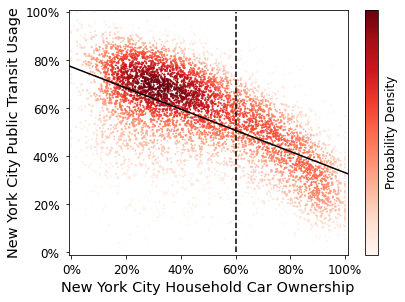

In [133]:
plt.figure(figsize = (6, 4.3))
plt.style.use('seaborn-paper')
plt.scatter(x, y, s = w / 500, c = z, cmap = 'Reds')
plt.plot(x1, y1, color = 'black', lw = 1.5)
cbar = plt.colorbar(ticks = [])
cbar.set_label(label = r'Probability Density', fontdict = {'size': 12})
plt.vlines(60, 0, 100, lw = 1.5, ls = '--', color = 'black')
plt.xlabel('New York City Household Car Ownership', size = 14.5)
plt.ylabel('New York City Public Transit Usage', size = 14.5)
plt.xticks([0, 20, 40, 60, 80, 100], ['0%', '20%', '40%', '60%', '80%', '100%'], size = 12)
plt.yticks([0, 20, 40, 60, 80, 100], ['0%', '20%', '40%', '60%', '80%', '100%'], size = 12)
plt.xlim(-1, 101)
plt.ylim(-1, 101)
plt.tight_layout()
plt.show()

# Figure 2A-F

In [146]:
def get_percentile(x, df, feat):
    return df[df[feat] < x].shape[0] / df.shape[0]

In [147]:
with open('../process_data/CBG_pairwise/CBG_reachability_3cities_1127.pkl', 'rb') as f:
    results = pickle.load(f)
with open('../process_data/behaviour_data/accessible_job_3cities_1127.pkl', 'rb') as f:
    job_dict = pickle.load(f)
with open('../process_data/behaviour_data/accessible_poi_3cities_1127.pkl', 'rb') as f:
    poi_dict = pickle.load(f)
with open('../process_data/behaviour_data/gyration_radius_2019_3to5_3cities.pkl', 'rb') as f:
    gdict = pickle.load(f)
gyr_dict_50 = gdict[50]
gyr_dict = gdict[100]
gyr_dict_200 = gdict[200]

In [148]:
thres = 60
cfeats = []
mean_dict = {}
for feat in ['reach', 'job', 'poi', 'park',
       'bank', 'education', 'grocery', 'health', 'school', 'elem_school']:
    mean_dict[feat] = 0
for city in ['newyork']:
    city_feats = cbg_feats[cbg_feats.census_block_group.isin(city_cbgs_dict[city_full[city]])].copy()
    city_feats = city_feats[city_feats['Total population'] > 100]
    city_feats['income_percentile'] = [get_percentile(x, city_feats, 'median_income') for x in city_feats.average_income]
    city_feats['reach'] = [results[city]['target_population'][thres].get(x, (np.nan, np.nan, np.nan))[0] for x in city_feats.census_block_group]
    city_feats['job'] = [job_dict[thres][cbg] for cbg in city_feats.census_block_group]
    city_feats['job_percentile'] = [get_percentile(x, city_feats, 'job') for x in city_feats.job]
    city_feats['poi'] = [poi_dict[thres]['poi'][cbg] for cbg in city_feats.census_block_group]
    city_feats['poi_percentile'] = [get_percentile(x, city_feats, 'poi') for x in city_feats.poi]
    city_feats['park'] = [poi_dict[thres]['park'][cbg] for cbg in city_feats.census_block_group]
    city_feats['bank'] = [poi_dict[thres]['bank'][cbg] for cbg in city_feats.census_block_group]
    city_feats['education'] = [poi_dict[thres]['education'][cbg] for cbg in city_feats.census_block_group]
    city_feats['grocery'] = [poi_dict[thres]['grocery'][cbg] for cbg in city_feats.census_block_group]
    city_feats['health'] = [poi_dict[thres]['health'][cbg] for cbg in city_feats.census_block_group]
    city_feats['health1'] = [poi_dict[thres]['health_new'][cbg] for cbg in city_feats.census_block_group]
    city_feats['school'] = [poi_dict[thres]['school'][cbg] for cbg in city_feats.census_block_group]
    city_feats['elem_school'] = [poi_dict[thres]['elem_school'][cbg] for cbg in city_feats.census_block_group]
    city_feats['gyr_100'] = [gyr_dict[x] for x in city_feats.census_block_group]
    city_feats['gyr_50'] = [gyr_dict_50[x] for x in city_feats.census_block_group]
    city_feats['gyr_200'] = [gyr_dict_200[x] for x in city_feats.census_block_group]
    city_feats['city_name'] = city
    cfeats.append(city_feats.copy())
city_feats = pd.concat(cfeats, ignore_index = True)

In [149]:
city_feats[['census_block_group', 'Total population', 'Households total',
       'female_ratio',  'Hispanic_ratio', 'non_Hispanic_white_ratio',
       'non_Hispanic_black_ratio', 'bachelor_ratio', 'poverty_ratio',
       'average_income', 'vehicle_rate', 'unemployed_ratio', 'public_transit_ratio', 'foreign_born_ratio',
           'income_percentile', 'reach', 'job', 'park', 'bank', 'health', 'school'
           
           ]].to_csv('data/nyc_features.csv', index = False)

In [34]:
feat_dict = {'reach': 'Accessible Radius (km)', 'job': 'Accessible Job Opportunities', 'poi': 'Accessible POIs', 'park': 'Accessible Parks', 'health1': 'Accessible Medical Institutions',
       'bank': 'Accessible Banks', 'education': 'Accessible Education Services', 'grocery': 'Accessible Grocery Stores', 'health': 'Accessible Healthcare Facilities', 'school': 'Accessible Schools'}
def draw_fig2_1(draw_feat = 'reach', thres = 0.6, sigs = [1,1,1]):
    pls = []
    y1s = []
    y2s = []
    colors = ['#D12920', '#2E59A7', '#32788A']
    title = feat_dict.get(draw_feat, None)
    for feat in ['non_Hispanic_white_ratio', 'Hispanic_ratio', 'non_Hispanic_black_ratio']:
        temp = city_feats[city_feats[feat] >= 0.5]
        temp = temp[temp['vehicle_rate'] <= thres]
        temp = temp.dropna(subset = [draw_feat])
        
        pls.append(np.average(temp[draw_feat], weights = temp['Total population']))
        bstrap_result = []
        for k in range(200):
            bstrap_result.append(temp[draw_feat].sample(n = temp.shape[0], replace = True, weights =  temp['Total population']).mean())
        low, high = np.percentile(bstrap_result, [2.5, 97.5])
        y1s.append(low)
        y2s.append(high)
    print(pls)
    plt.figure(figsize = (6, 4.5))
    plt.style.use('seaborn-paper')
    er = np.abs(np.array([y1s, y2s]) - np.array(pls))
    plt.bar([1,2,3], height = pls, width = 0.75, color = colors, edgecolor = colors,
            linewidth = 1, alpha = 0.6)
    for i in range(3):
        plt.errorbar([i+1], y = [pls[i]], yerr = er[:, i:i+1], fmt = 'o', markersize = 0, ecolor = colors[i],
                capsize = 20, elinewidth = 2, capthick = 1, alpha = 0.8)
    plt.xticks([1,2,3], ['White\nMajority', 'Hispanic\nMajority', 'Black\nMajority'], size = 16)
    plt.yticks(size = 13)
    plt.ylabel(title, size = 16)
    highest = np.max(y2s)
    lowest = 0
    ylim_low = 0
    plt.ylim(ylim_low, highest+(highest-lowest)/3)
    
    y0 = ylim_low
    y1 = highest+(highest-lowest)/3 - y0
    # 1vs2
    if sigs[0]:
        plt.vlines(1.05, ymin = y0 + 0.78*y1, ymax = y0+0.83*y1, lw = 0.75, color = 'black')
        plt.vlines(1.95, ymin = y0 + 0.78*y1, ymax = y0+0.83*y1, lw = 0.75, color = 'black')
        plt.hlines(y0+0.83*y1, 1.05, 1.95, lw = 0.75, color = 'black')
        plt.text(s = '***', x = 1.5, y = y0+0.84*y1, va = 'center', ha = 'center', size = 15)
    # 2vs3
    if sigs[1]:
        plt.vlines(2.05, ymin = y0 + 0.78*y1, ymax = y0+0.83*y1, lw = 0.75, color = 'black')
        plt.vlines(2.95, ymin = y0 + 0.78*y1, ymax = y0+0.83*y1, lw = 0.75, color = 'black')
        plt.hlines(y0+0.83*y1, 2.05, 2.95, lw = 0.75, color = 'black')
        plt.text(s = '***', x = 2.5, y = y0+0.84*y1, va = 'center', ha = 'center', size = 15)
    # 1vs3
    if sigs[2]:
        plt.vlines(1.05, ymin = y0 + 0.88*y1, ymax = y0+0.93*y1, lw = 0.75, color = 'black')
        plt.vlines(2.95, ymin = y0 + 0.88*y1, ymax = y0+0.93*y1, lw = 0.75, color = 'black')
        plt.hlines(y0+0.93*y1, 1.05, 2.95, lw = 0.75, color = 'black')
        plt.text(s = '***', x = 2, y = y0+0.94*y1, va = 'center', ha = 'center', size = 15)
    plt.tight_layout()
    plt.show()

[12.51320122664441, 11.1609964362222, 10.617252226578113]


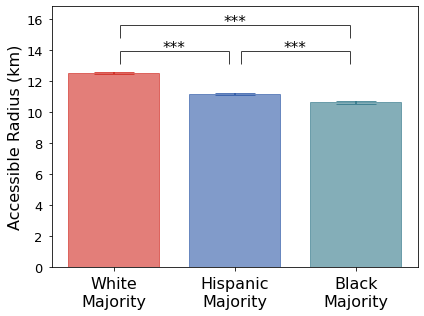

[3237131.8551817336, 2651021.7817578586, 2357207.328264676]


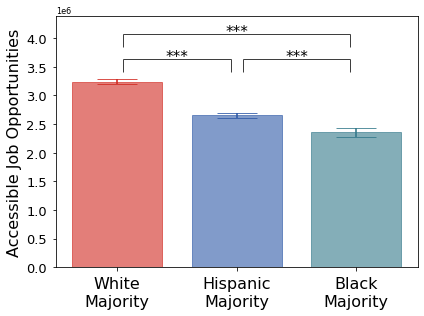

[380.8101157633996, 294.8424183340061, 283.52432906984075]


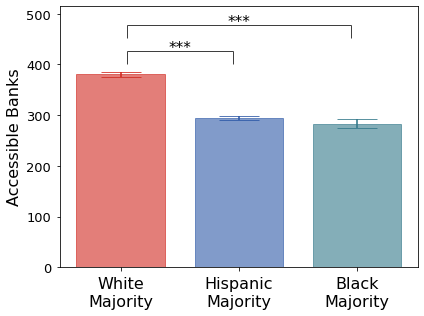

[9329.662919099075, 7352.165960204141, 6687.053944094408]


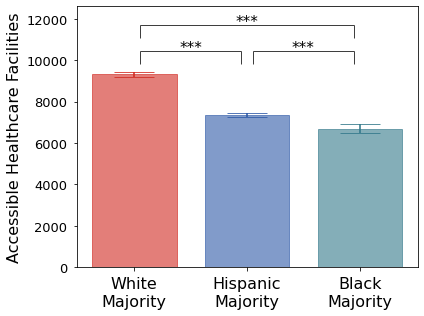

[526.484341971732, 396.458974105097, 379.63079512438827]


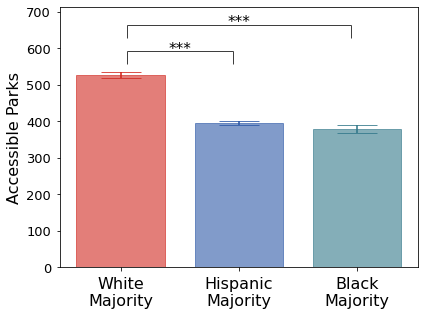

[1519.0101251632645, 1140.1621690342681, 1122.608120522484]


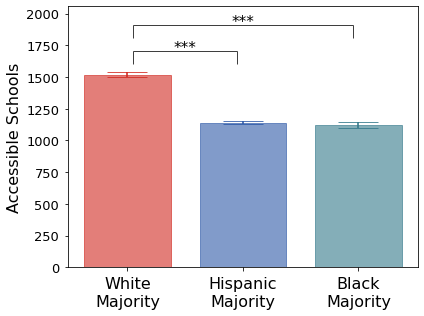

In [35]:
draw_fig2_1('reach', thres = 0.6)
draw_fig2_1('job', thres = 0.6)
draw_fig2_1('bank', thres = 0.6, sigs = [1,0,1])
draw_fig2_1('health', thres = 0.6)
draw_fig2_1('park', thres = 0.6, sigs = [1,0,1])
draw_fig2_1('school', thres = 0.6, sigs = [1,0,1])

In [54]:
thres = 0.6
temp = city_feats[city_feats['vehicle_rate'] <= thres]
white_cbg = list(temp[temp.non_Hispanic_white_ratio >= 0.5].census_block_group)
black_cbg = list(temp[temp.non_Hispanic_black_ratio >= 0.5].census_block_group)
Hispanic_cbg = list(temp[temp.Hispanic_ratio >= 0.5].census_block_group)
asian_cbg = list(temp[temp.asian_ratio >= 0.5].census_block_group)
def get_race(x):
    if x in white_cbg:
        return 'white'
    if x in black_cbg:
        return 'black'
    if x in Hispanic_cbg:
        return 'Hispanic'
    return 'other'
temp['Race'] = [get_race(x) for x in temp.census_block_group]
temp[['non_Hispanic_white_ratio', 'non_Hispanic_black_ratio', 'Hispanic_ratio', 'average_income', 'bachelor_ratio', 'poverty_ratio',
        'median_age', 'unemployed_ratio', 'public_transit_ratio', 'vehicle_rate', 'foreign_born_ratio', 'single_family_ratio']] = temp[['non_Hispanic_white_ratio', 'non_Hispanic_black_ratio', 'Hispanic_ratio', 'average_income', 'bachelor_ratio', 'poverty_ratio',
        'median_age', 'unemployed_ratio', 'public_transit_ratio', 'vehicle_rate', 'foreign_born_ratio', 'single_family_ratio']].fillna(0)
w = temp['Total population']

In [57]:
def control_regression_table_2_2(draw_feat = 'reach', wls_name = False, balanced = False):
    title = feat_dict.get(draw_feat, None)
    race_r_dict = {}
    for r in ['white', 'black', 'Hispanic', 'other']:
        race_r_dict[r] = np.sum(temp[temp.Race == r]['Total population'])
    temp['racepop'] = [race_r_dict[r] for r in temp['Race']]
    balanced_w = temp['Total population'] / temp['racepop']
    
    if wls_name:
        mod = wls(draw_feat + " ~ C(Race, Treatment(reference='white'))+income_percentile+vehicle_rate+public_transit_ratio+poverty_ratio", data=temp, weights = w)
        mod = wls(draw_feat + " ~ C(Race, Treatment(reference='white'))+income_percentile+vehicle_rate+public_transit_ratio", data=temp, weights = w)
        mod = wls(draw_feat + " ~ C(Race, Treatment(reference='white'))+unemployed_ratio+foreign_born_ratio+income_percentile+vehicle_rate+public_transit_ratio+poverty_ratio", data=temp, weights = w)
        if balanced:
            mod = wls(draw_feat + " ~ C(Race, Treatment(reference='white'))+income_percentile+vehicle_rate+public_transit_ratio", data=temp, weights = balanced_w)
        
    else:
        mod = ols(draw_feat + " ~ C(Race, Treatment(reference='white'))+income_percentile+vehicle_rate+public_transit_ratio+poverty_ratio", data=temp)
        mod = ols(draw_feat + " ~ C(Race, Treatment(reference='white'))+income_percentile+vehicle_rate+public_transit_ratio", data=temp)

    res = mod.fit()
    print(res.summary())

In [58]:
for feat in [ 'reach', 'job', 'park',
       'bank', 'health', 'school', 'health1']:
    control_regression_table_2_2(feat, wls_name = True)

                            WLS Regression Results                            
Dep. Variable:                  reach   R-squared:                       0.348
Model:                            WLS   Adj. R-squared:                  0.347
Method:                 Least Squares   F-statistic:                     243.3
Date:                Tue, 31 Oct 2023   Prob (F-statistic):               0.00
Time:                        20:40:54   Log-Likelihood:                -7440.5
No. Observations:                4109   AIC:                         1.490e+04
Df Residuals:                    4099   BIC:                         1.496e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------

                            WLS Regression Results                            
Dep. Variable:                 health   R-squared:                       0.440
Model:                            WLS   Adj. R-squared:                  0.438
Method:                 Least Squares   F-statistic:                     358.0
Date:                Tue, 31 Oct 2023   Prob (F-statistic):               0.00
Time:                        20:40:54   Log-Likelihood:                -37253.
No. Observations:                4118   AIC:                         7.453e+04
Df Residuals:                    4108   BIC:                         7.459e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------

# Figure 4

In [71]:
with open('../process_data/behaviour_data/gyration_radius_nyc_msa.pkl', 'rb') as f:
    newgyrdict = pickle.load(f)
with open('../process_data/behaviour_data/gyration_radius_nyc_city.pkl', 'rb') as f:
    newgyrdict_city = pickle.load(f)


In [150]:
education = [611110.0, 611210.0, 611310.0, 611410.0, 611420.0, 611630.0, 611691.0]
parks  = [712190.0]
banks = [522110.0] # COmmercial Banking
schools = [611110.0, 611210.0, 611310.0]
grocery = [445110]
health = [623.0, 624.0, 621111.0, 621112.0, 621210.0, 621310.0, 621320.0, 621330.0, 621340.0, 621399.0, 621410.0, 621492.0, 621493.0, 621498.0, 621511.0, 621512.0, 621610.0, 621910.0, 621991.0, 621999.0, 622110.0, 622210.0, 622310.0, 623110.0, 623311.0, 623312.0, 624110.0, 624120.0, 624190.0, 624210.0, 624221.0, 624410.0]

with open('../process_data/monthly_home_panel.pkl', 'rb') as f:
    device_dicts = pickle.load(f)
for mo in ['2019-03', '2019-04', '2019-05']:
    for k in list(device_dicts[mo].keys()):
        if type(k) == str:
            try:
                device_dicts[mo][int(k)] = device_dicts[mo][k]
            except:
                pass
cbg_feats['Total population'] = cbg_feats['Total population'].fillna(0)
population_dict = dict(zip(cbg_feats.census_block_group, cbg_feats['Total population']))
visit_df = []
for city in ['newyork']:
    for mo in ['2019-03', '2019-04', '2019-05']:
        visit_df1 = pd.read_csv('../process_data/transit_segregation/nyc_'+mo+'_cbg_naics.csv')
        visit_df1['devices'] = [device_dicts[mo].get(cbgs, 0) for cbgs in visit_df1.home_cbg]
        visit_df1['normalize'] = [device_dicts[mo].get(cbgs, 0) / (population_dict.get(cbgs, 0)+1e-10) for cbgs in visit_df1.home_cbg]
        visit_df1['normalized_visit'] = visit_df1['visits'] / visit_df1['normalize']
        visit_df1['normalized_visitors'] = visit_df1['visitors'] / visit_df1['normalize']
        visit_df1['normalized_visitors1'] = visit_df1['visitors'] / visit_df1['devices']
        visit_df1['percapita_visits'] = visit_df1['visits'] / visit_df1['devices']
        visit_df.append(visit_df1.copy())
visit_df = pd.concat(visit_df, ignore_index = True)
visit_df = visit_df.groupby(['home_cbg', 'naics_code'], as_index = False)[['visits', 'normalized_visit', 'visitors', 'normalized_visitors', 'normalized_visitors1', 'percapita_visits']].agg('sum')

In [151]:
# 带有访问距离的visit df
vdf_dist = {}
for mo in ['2019-03', '2019-04', '2019-05']:
    vdf_with_dist = pd.read_csv('../process_data/transit_segregation/nyc_'+mo+'_cbg_naics_distance.csv')
    vdf_dist[mo] = vdf_with_dist.copy()

In [152]:
# 计算每个cbg去特定类型POI的平均距离和均方距离
def get_gyr_to_category(ncode, maxdist = None):
    temps = []
    for mo in ['2019-03', '2019-04', '2019-05']:
        vdf_with_dist = vdf_dist[mo]
        if ncode == 'all':
            temp = vdf_with_dist
        else:
            temp = vdf_with_dist[vdf_with_dist.naics_code.isin(ncode)]
        temp = temp[['home_cbg', 'visits', 'distance']]
        if maxdist is not None:
            temp = temp[temp.distance <= maxdist]
#         upper = np.percentile(temp.distance, 99)
#         temp.distance = temp.distance.clip(upper = upper)
        temp['vtimesdist'] = temp['visits'] * temp['distance']
        temp['vtimesdist2'] = temp['visits'] * temp['distance'] * temp['distance']
        temp = temp.groupby('home_cbg', as_index = False).agg('sum')
        temp['devices'] = [device_dicts[mo].get(cbgs, 0) for cbgs in temp.home_cbg]
        temp['avg_dist'] = temp.vtimesdist / temp.visits
        temp['avg_dist2'] = temp.vtimesdist2 / temp.visits
        temp['ratio'] = temp['visits'] / temp['devices']
        temps.append(temp[['home_cbg', 'avg_dist', 'avg_dist2', 'ratio']].copy())
    temps = pd.concat(temps, ignore_index = True)
    temps['avg_dist'] = temps['avg_dist'] * temps['ratio']
    temps['avg_dist2'] = temps['avg_dist2'] * temps['ratio']
    temps = temps.groupby('home_cbg', as_index = False).agg('sum')
    temps['avg_dist'] = temps['avg_dist'] / temps['ratio']
    temps['avg_dist2'] = np.sqrt(temps['avg_dist2'] / temps['ratio'])
    temps = temps.rename(columns = {'home_cbg': 'census_block_group'})
    return temps[['census_block_group', 'avg_dist', 'avg_dist2']]
def get_total_visit(ncode):
    temps = []
    for mo in ['2019-03', '2019-04', '2019-05']:
        vdf_with_dist = vdf_dist[mo]
        if ncode == 'all':
            temp = vdf_with_dist
        else:
            temp = vdf_with_dist[vdf_with_dist.naics_code.isin(ncode)]
        temp = temp[['home_cbg', 'visits']]
        temp = temp.groupby('home_cbg', as_index = False).agg('sum')
        temp['devices'] = [device_dicts[mo].get(cbgs, 0) for cbgs in temp.home_cbg]
        temp['percapita_visits'] = temp['visits'] / temp['devices']
        temps.append(temp[['home_cbg', 'percapita_visits']].copy())
    temps = pd.concat(temps, ignore_index = True)
    temps = temps.groupby('home_cbg', as_index = False).agg('sum')
    temps = temps.rename(columns = {'home_cbg': 'census_block_group'})
    return temps[['census_block_group', 'percapita_visits']]
# 每个cbg的gyration radius（各访问点到重心的均方距离）
def get_total_gyration_radius(cbgid, maxdist = None):
    temps = []
    for mo in ['2019-03', '2019-04', '2019-05']:
        vdf_with_dist = vdf_dist[mo]
        temp = vdf_with_dist[vdf_with_dist.home_cbg == cbgid]
        if maxdist is not None:
            temp = temp[temp.distance <= maxdist]
        temp['devices'] = [device_dicts[mo].get(cbgs, 0) for cbgs in temp.home_cbg]
        temp['percapita_visits'] = temp['visits'] / temp['devices']
        temp = temp[temp.devices > 0]
        temps.append(temp[['percapita_visits', 'distance', 'lon', 'lat']].copy())
    temps = pd.concat(temps, ignore_index = True)
    if temps.shape[0] <= 1:
        return (np.nan, np.nan)
    upper = np.percentile(temps.distance, 99)
    temps = temps[temps.distance <= upper]
    avg_lon, avg_lat = np.average(temps.lon, weights = temps.percapita_visits), np.average(temps.lat, weights = temps.percapita_visits)
    temps['r'] = [geodesic((cbg_lat, cbg_lon), (avg_lat, avg_lon)).km for cbg_lat, cbg_lon in zip(temps.lat, temps.lon)]     
    return np.average(temps.r, weights = temps.percapita_visits), np.sqrt(np.average(temps.r**2, weights = temps.percapita_visits))

In [153]:
def get_percentile(x, df, feat):
    return df[df[feat] < x].shape[0] / df.shape[0]

In [154]:
thres = 60
cfeats = []
mean_dict = {}
for feat in ['reach', 'job', 'poi', 'park',
       'bank', 'education', 'grocery', 'health', 'school', 'elem_school']:
    mean_dict[feat] = 0
for city in ['newyork']:
    city_feats = cbg_feats[cbg_feats.census_block_group.isin(city_cbgs_dict[city_full[city]])].copy()
    city_feats = city_feats[city_feats['Total population'] > 100]
    city_feats['income_percentile'] = [get_percentile(x, city_feats, 'median_income') for x in city_feats.average_income]
    city_feats['reach'] = [results[city]['target_population'][thres].get(x, (np.nan, np.nan, np.nan))[0] for x in city_feats.census_block_group]
    city_feats['job'] = [job_dict[thres][cbg] for cbg in city_feats.census_block_group]
    city_feats['job_percentile'] = [get_percentile(x, city_feats, 'job') for x in city_feats.job]
    city_feats['poi'] = [poi_dict[thres]['poi'][cbg] for cbg in city_feats.census_block_group]
    city_feats['poi_percentile'] = [get_percentile(x, city_feats, 'poi') for x in city_feats.poi]
    city_feats['park'] = [poi_dict[thres]['park'][cbg] for cbg in city_feats.census_block_group]
    city_feats['bank'] = [poi_dict[thres]['bank'][cbg] for cbg in city_feats.census_block_group]
    city_feats['education'] = [poi_dict[thres]['education'][cbg] for cbg in city_feats.census_block_group]
    city_feats['grocery'] = [poi_dict[thres]['grocery'][cbg] for cbg in city_feats.census_block_group]
    city_feats['health'] = [poi_dict[thres]['health'][cbg] for cbg in city_feats.census_block_group]
    city_feats['health1'] = [poi_dict[thres]['health_new'][cbg] for cbg in city_feats.census_block_group]
    city_feats['school'] = [poi_dict[thres]['school'][cbg] for cbg in city_feats.census_block_group]
    city_feats['elem_school'] = [poi_dict[thres]['elem_school'][cbg] for cbg in city_feats.census_block_group]
    city_feats['gyr_100'] = [gyr_dict[x] for x in city_feats.census_block_group]
    city_feats['gyr_50'] = [gyr_dict_50[x] for x in city_feats.census_block_group]
    city_feats['gyr_200'] = [gyr_dict_200[x] for x in city_feats.census_block_group]
    city_feats['gyr_msa'] = [newgyrdict[x][0] for x in city_feats.census_block_group]
    city_feats['gyr_msa2'] = [newgyrdict[x][1] for x in city_feats.census_block_group]
    city_feats['gyr_city'] = [newgyrdict_city[x][0] for x in city_feats.census_block_group]
    city_feats['gyr_city2'] = [newgyrdict_city[x][1] for x in city_feats.census_block_group]
    city_feats['city_name'] = city
    cfeats.append(city_feats.copy())
city_feats = pd.concat(cfeats, ignore_index = True)

In [167]:
cate_df = get_gyr_to_category(banks)
city_feats1 = pd.merge(city_feats, cate_df, on = 'census_block_group', how = 'left')
city_feats1.rename(columns = {'avg_dist2': 'bank_dist'}, inplace = True)
cate_df = get_gyr_to_category(health)
city_feats1 = pd.merge(city_feats1, cate_df, on = 'census_block_group', how = 'left')
city_feats1.rename(columns = {'avg_dist2': 'health_dist'}, inplace = True)
cate_df = get_gyr_to_category(parks)
city_feats1 = pd.merge(city_feats1, cate_df, on = 'census_block_group', how = 'left')
city_feats1.rename(columns = {'avg_dist2': 'park_dist'}, inplace = True)
cate_df = get_gyr_to_category(schools)
city_feats1 = pd.merge(city_feats1, cate_df, on = 'census_block_group', how = 'left')
city_feats1.rename(columns = {'avg_dist2': 'school_dist'}, inplace = True)

city_feats1.rename(columns = {'gyr_100': 'gyr'}, inplace = True)

In [168]:
city_feats1[['census_block_group', 'Total population', 'Households total',
       'female_ratio',  'Hispanic_ratio', 'non_Hispanic_white_ratio',
       'non_Hispanic_black_ratio', 'bachelor_ratio', 'poverty_ratio',
       'average_income', 'vehicle_rate', 'unemployed_ratio', 'public_transit_ratio', 'foreign_born_ratio',
           'income_percentile', 'reach', 'job', 'park', 'bank', 'health', 'school',
           'gyr', 'bank_dist', 'health_dist', 'park_dist', 'school_dist'
           ]].to_csv('data/nyc_features.csv', index = False)

In [73]:
def draw_4cut(cfeat, featx, featy, xlab, ylab):
    pls = []
    y1s = []
    y2s = []
    nocar = cfeat[cfeat['vehicle_rate'] <= 0.6]
    nocar['cut_poi'], bins = pd.qcut(nocar[featx], 4, labels = [1,2,3,4], retbins = True)
    for i in [1, 2, 3, 4]:
        temp = nocar[nocar['cut_poi'] == i]
        temp = temp.dropna(subset = [featy])
        pls.append(np.average(temp[featy], weights = temp['Total population']))
        bstrap_result = []
        for k in range(200):
            bstrap_result.append(temp[featy].sample(n = temp.shape[0], replace = True, weights =  temp['Total population']).mean())
        low, high = np.percentile(bstrap_result, [2.5, 97.5])
        y1s.append(low)
        y2s.append(high)
        if i == 1:
            lowest = np.array(temp[featy])
        elif i == 4:
            highest = np.array(temp[featy])
    colors = ['#D12920', '#2E59A7', '#32788A', '#F99137']
    plt.figure(figsize = (6, 4.5))
    plt.style.use('seaborn-paper')
    er = np.abs(np.array([y1s, y2s]) - np.array(pls))
    plt.bar([1,2,3,4], height = pls, width = 0.75, color = colors, edgecolor = colors,
            linewidth = 2, alpha = 0.6)
    for i in range(4):
        plt.errorbar([i+1], y = [pls[i]], yerr = er[:, i:i+1], fmt = 'o', markersize = 0, ecolor = colors[i],
                capsize = 20, elinewidth = 2, capthick = 1, alpha = 0.8)
    plt.xticks([1,2,3,4], ['First\nQuartile', 'Second\nQuartile', 'Third\nQuartile','Fourth\nQuartile'], size = 14)
    plt.yticks(size = 14)
    plt.xlabel(xlab, size = 18)
    plt.ylabel(ylab, size = 17)
    plt.tight_layout()
    print(pls)
    print(ttest_ind(lowest, highest))
    plt.show()

[10.563529945176564, 11.12513483337444, 11.469834757734084, 12.127331591626433]
Ttest_indResult(statistic=-15.754142437036432, pvalue=7.079447834849745e-53)


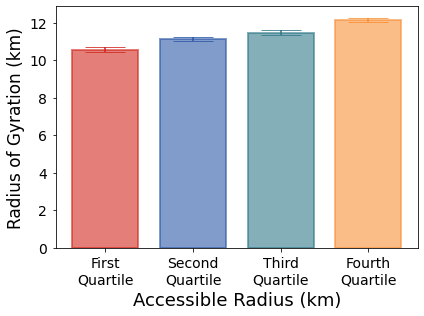

In [74]:
draw_4cut(city_feats, 'reach', 'gyr_100', 'Accessible Radius (km)', 'Radius of Gyration (km)')

[0.11957523130774496, 0.10628668798686994, 0.09128201229211201, 0.06151857161978758]
Ttest_indResult(statistic=17.73888402881512, pvalue=1.2681035847113657e-65)


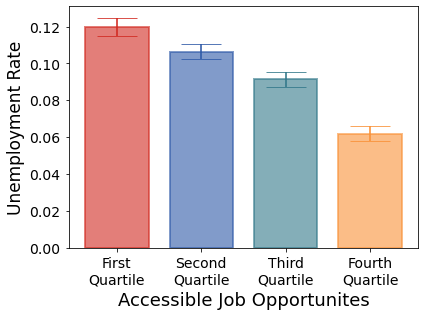

In [75]:
draw_4cut(city_feats, 'job', 'unemployed_ratio','Accessible Job Opportunites', 'Unemployment Rate')

[6.840692788920351, 6.395623325574894, 5.846257452759536, 5.2776541808651745]
Ttest_indResult(statistic=3.837576243113967, pvalue=0.00013494056253822456)


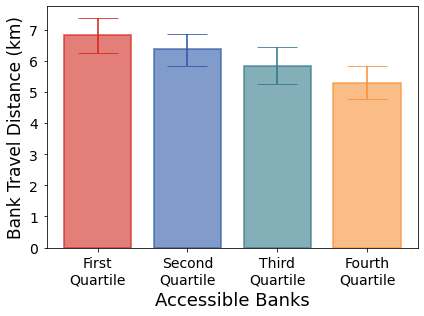

In [156]:
cate_df = get_gyr_to_category(banks)
city_feats1 = pd.merge(city_feats, cate_df, on = 'census_block_group', how = 'left')
draw_4cut(city_feats1, 'bank', 'avg_dist2', 'Accessible Banks', 'Bank Travel Distance (km)')

[7.47059483282714, 6.906652244713157, 6.523586226315244, 6.642309062956887]
Ttest_indResult(statistic=9.94132304401286, pvalue=8.898421124589451e-23)


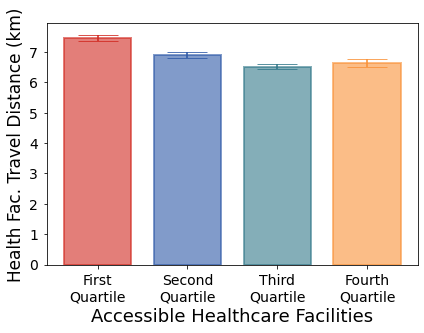

In [80]:
cate_df = get_gyr_to_category(health)
city_feats1 = pd.merge(city_feats, cate_df, on = 'census_block_group', how = 'left')
draw_4cut(city_feats1, 'health', 'avg_dist2', 'Accessible Healthcare Facilities', 'Health Fac. Travel Distance (km)')

[8.460451827798746, 7.678709020924432, 7.441163319428062, 6.801081278893316]
Ttest_indResult(statistic=19.45978768587782, pvalue=1.5104748239505402e-77)


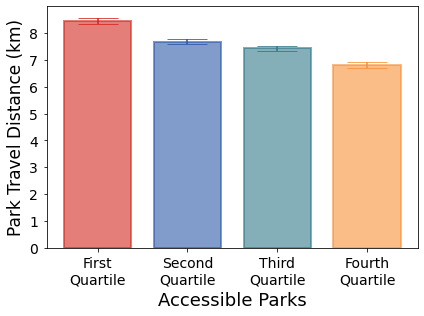

In [81]:
cate_df = get_gyr_to_category(parks)
city_feats1 = pd.merge(city_feats, cate_df, on = 'census_block_group', how = 'left')
draw_4cut(city_feats1, 'park', 'avg_dist2', 'Accessible Parks', 'Park Travel Distance (km)')

[7.4375857469231965, 6.930038978826113, 6.465742426717279, 5.962958498128486]
Ttest_indResult(statistic=15.027996885350154, pvalue=1.6363171328502417e-48)


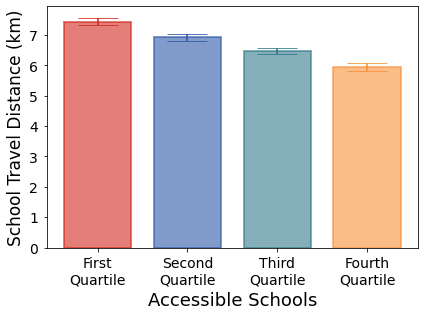

In [82]:
cate_df = get_gyr_to_category(schools)
city_feats1 = pd.merge(city_feats, cate_df, on = 'census_block_group', how = 'left')
draw_4cut(city_feats1, 'school', 'avg_dist2', 'Accessible Schools', 'School Travel Distance (km)')

# Figure 5A

In [89]:
nocar = city_feats[city_feats['vehicle_rate'] <= 0.6]
# nocar = nocar.dropna(subset = ['reach', 'gyr_100'])
white_cbg = list(nocar[nocar.non_Hispanic_white_ratio >= 0.5].census_block_group)
black_cbg = list(nocar[nocar.non_Hispanic_black_ratio >= 0.5].census_block_group)
Hispanic_cbg = list(nocar[nocar.Hispanic_ratio >= 0.5].census_block_group)
def get_race(x):
    if x in white_cbg:
        return 'white'
    if x in black_cbg:
        return 'black'
    if x in Hispanic_cbg:
        return 'Hispanic'
    return 'other'
def get_race_num(x):
    if x in white_cbg:
        return 1
    if x in black_cbg:
        return 3
    if x in Hispanic_cbg:
        return 2
    return np.nan
nocar['Race'] = [get_race(x) for x in nocar.census_block_group]
nocar['Race_num'] = [get_race_num(x) for x in nocar.census_block_group]
nocar = nocar.dropna(subset = ['Race_num', 'reach', 'gyr_100'])
cate_df = get_gyr_to_category(health)
city_feats1 = pd.merge(nocar, cate_df, on = 'census_block_group', how = 'left')

11 [1000.0, 2000.0, 3000.0, 4000.0, 5000.0, 6000.0, 7000.0, 8000.0, 9000.0, 10000.0, 11000.0] [9.708870527007559, 8.500297350350131, 7.905471606536262, 7.585376338340664, 7.278472469610647, 7.221340812536207, 7.0619559353265915, 6.610181060261167, 6.107049019211142, 6.131239971210385, 6.399197015661322]
11 [1000.0, 2000.0, 3000.0, 4000.0, 5000.0, 6000.0, 7000.0, 8000.0, 9000.0, 10000.0, 11000.0] [8.40393169315218, 7.626194660071578, 7.130189622910826, 6.836258659623268, 6.7818161513319435, 6.914722312246793, 6.878813707953843, 6.845756675187841, 6.693085250278965, 6.639638979749554, 6.6019334785411345]
11 [1000.0, 2000.0, 3000.0, 4000.0, 5000.0, 6000.0, 7000.0, 8000.0, 9000.0, 10000.0, 11000.0] [8.505297634934461, 8.191114677291086, 7.715280221674861, 7.2314673449710165, 6.953396455901498, 6.57863999802128, 6.547182014437861, 6.591253760882728, 6.643379299275669, 6.647791648700404, 6.5556446074179044]


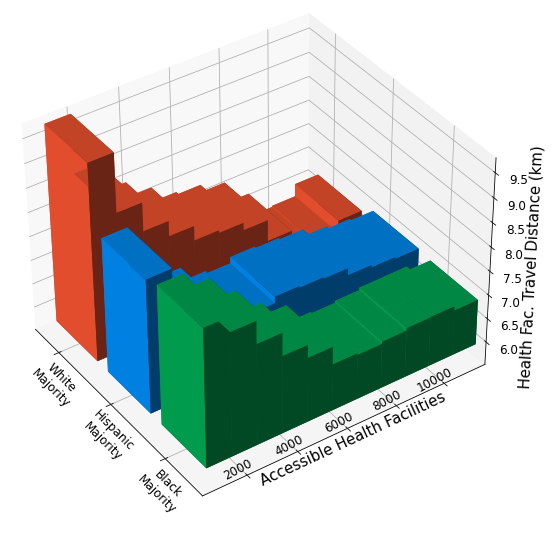

In [90]:
from scipy import stats
from mpl_toolkits.mplot3d import Axes3D

bins = np.linspace(1000, 11000, 11)
fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=38, azim=-35)
ax.get_proj = lambda: np.dot(Axes3D.get_proj(ax), np.diag([0.9, 1, 1, 1]))
cls = ['#FF5733', '#0092FF', '#00B057'] # FF5733的 threedom
places = [0, 1.5, 2.0, 2.5]
z_bot = 5.6

for race in [1, 2, 3]:
    x = []
    y = []
    dy = []
    h = []
    dx = bins[1] - bins[0]
    temp_race = city_feats1[city_feats1.Race_num == race]
    temp_race = temp_race.dropna(subset = ['health', 'avg_dist2'])
    for i in range(len(bins)):
        temp = temp_race[(temp_race.health > bins[i]- 1.5*dx) & (temp_race.health <= bins[i]+ 1.5*dx)]
        if temp.shape[0] == 0:
            print(race, i)
            pass
        else:
            x.append(places[race])
            y.append(bins[i])
            dy.append(temp.shape[0] / temp_race.shape[0] * 1.5)
            h.append(np.average(temp.avg_dist2, weights = temp['Total population']))
    z_bottom = np.array(x) * 0 + z_bot
    print(len(x), y, h)
    pl = ax.bar3d(x, y, z_bottom, 0.4, dx, h - z_bottom, shade = True, color = cls[race-1], alpha = 1.0)
    pl._sort_zpos = race
    
ax.set_ylabel('Accessible Health Facilities', size = 15, labelpad = -13)
ax.set_zlabel('Health Fac. Travel Distance (km)', size = 15)
ax.set_zlim(z_bot, None)
plt.xticks([1.7, 2.2, 2.7], ['White\nMajority', 'Hispanic\nMajority', 'Black\nMajority'], size = 12, rotation = -45, ha = 'center')
ax.tick_params(axis='x', pad = -5)
ax.tick_params(axis='y', labelsize=12, pad = -22, rotation = 28)
ax.tick_params(axis='z', labelsize=12)

xlim_max = 3
ax.set_xlim(1.5, xlim_max)
ax.set_ylim(500, 11500)

plt.show()

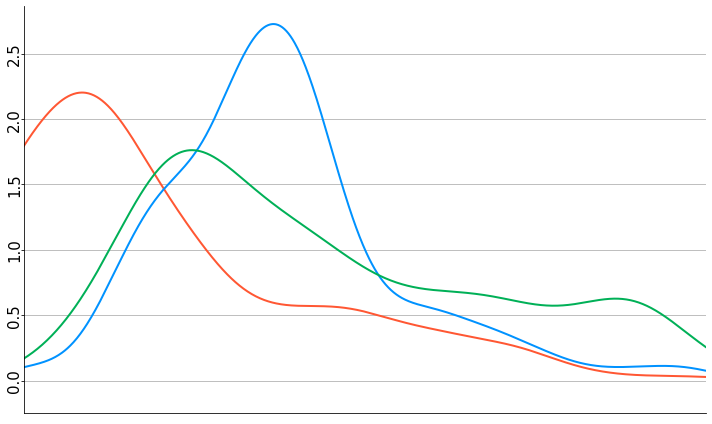

In [91]:
fig, ax = plt.subplots(figsize = (10, 6))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
for race in [1, 2, 3]:
    temp_race = city_feats1[city_feats1.Race_num == race]
    temp_race = temp_race.dropna(subset = ['health', 'avg_dist2'])
    kde = stats.gaussian_kde(temp_race.health, weights = temp_race['Total population'])
    x_vals = np.linspace(500, 11500, 1000)
    density = kde(x_vals)
    plt.plot(x_vals, density, color = cls[race-1], lw = 2)
plt.xlim(500, 11500)
plt.xticks([])
plt.ylim(-2.5e-5, None)
plt.yticks([0, 5e-5, 10e-5, 15e-5, 20e-5, 25e-5 ], ['0.0', '0.5', '1.0', '1.5', '2.0', '2.5'], rotation = 90, size = 15, ha = 'center', va = 'center')
ax.yaxis.grid(True, ydata = [1e-5])
ax.invert_xaxis()
plt.tight_layout()
plt.show()


## Figure 6

In [169]:
with open('../process_data/transit_segregation/public_housing_distance.pkl', 'rb') as f:
    public_housing_dist_dict = pickle.load(f)
nycha_developments = gpd.read_file('../places_shapefile/Map of NYCHA Developments/geo_export_c90cf5d5-784c-49f1-a0e1-6528501827d9.shp')
nycha_developments = nycha_developments.to_crs(curr_gpd.crs)

In [170]:
cfeats = []
thres = 60
mean_dict = {}
for city in ['newyork']:
    city_feats = cbg_feats[cbg_feats.census_block_group.isin(city_cbgs_dict[city_full[city]])].copy()
    city_feats = city_feats[city_feats['Total population'] > 100]
    city_feats['reach'] = [results[city]['target_population'][thres].get(x, (np.nan, np.nan, np.nan))[0] for x in city_feats.census_block_group]
#     city_feats['income_percentile'] = [get_percentile(x, city_feats, 'average_income') for x in city_feats.average_income]
    city_feats['job'] = [job_dict[thres][cbg] for cbg in city_feats.census_block_group]
    city_feats['poi'] = [poi_dict[thres]['poi'][cbg] for cbg in city_feats.census_block_group]
    city_feats['park'] = [poi_dict[thres]['park'][cbg] for cbg in city_feats.census_block_group]
    city_feats['bank'] = [poi_dict[thres]['bank'][cbg] for cbg in city_feats.census_block_group]
    city_feats['education'] = [poi_dict[thres]['education'][cbg] for cbg in city_feats.census_block_group]
    city_feats['grocery'] = [poi_dict[thres]['grocery'][cbg] for cbg in city_feats.census_block_group]
    city_feats['health'] = [poi_dict[thres]['health'][cbg] for cbg in city_feats.census_block_group]
    city_feats['school'] = [poi_dict[thres]['school'][cbg] for cbg in city_feats.census_block_group]
    city_feats['city_name'] = city
    city_feats['public_housing_dist'] = [public_housing_dist_dict[x] for x in city_feats.census_block_group]
    cfeats.append(city_feats.copy())
city_feats = pd.concat(cfeats, ignore_index = True)
city_feats['Public Housing District'] = city_feats['public_housing_dist'] <= 1
# city_feats['public_housing_district'] = city_feats['public_housing_dist'] <= 1
city_feats['public_housing_district'] = city_feats['public_housing_dist'] <= 1

In [172]:
city_feats2 = pd.read_csv('data/nyc_features.csv')
city_feats2 = pd.merge(city_feats2, city_feats[['census_block_group', 'public_housing_district']], on = 'census_block_group')
city_feats2.to_csv('data/nyc_features.csv', index = False)

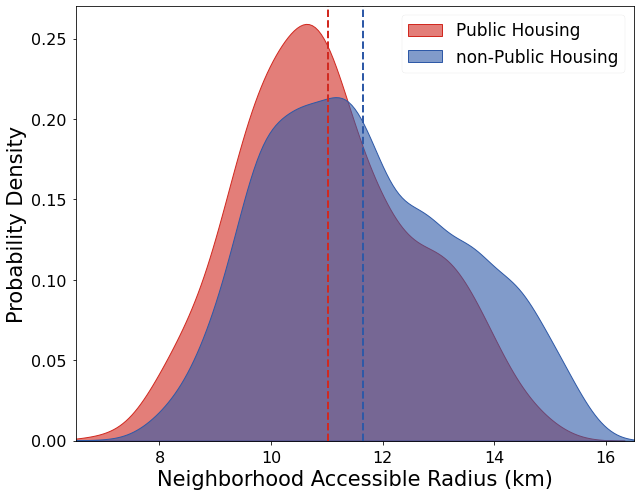

In [106]:
draw_feat = 'reach'
colors = ['#D12920', '#2E59A7', '#32788A']
plt.figure(figsize=(9, 7))
sns.kdeplot(data=city_feats[city_feats['vehicle_rate'] <= 0.6], palette = ['#2E59A7', '#D12920'], legend = False, hue_order = [False, True], x=draw_feat, hue="public_housing_district", fill=True, common_norm=False, alpha=.6, linewidth=1,)
plt.xlim(6.5, 16.5)
plt.ylim(0, 0.27)
plt.vlines(11.014574566055146, 0, 0.27, color = colors[0], ls = '--', lw = 2)
plt.vlines(11.649709917240532, 0, 0.27, color = colors[1], ls = '--', lw = 2)
plt.xticks( size = 16)
plt.yticks( size = 16)
plt.legend(labels = ['Public Housing', 'non-Public Housing'], fontsize = 17, loc = 'upper right')
plt.ylabel('Probability Density', size = 21)
plt.xlabel('Neighborhood Accessible Radius (km)', size = 21)
plt.tight_layout()
plt.show()

In [107]:
thres = 0.6
temp = city_feats[city_feats['vehicle_rate'] <= thres]
white_cbg = list(temp[temp.non_Hispanic_white_ratio >= 0.5].census_block_group)
black_cbg = list(temp[temp.non_Hispanic_black_ratio >= 0.5].census_block_group)
Hispanic_cbg = list(temp[temp.Hispanic_ratio >= 0.5].census_block_group)
asian_cbg = list(temp[temp.asian_ratio >= 0.5].census_block_group)
def get_race(x):
    if x in white_cbg:
        return 'white'
    if x in black_cbg:
        return 'black'
    if x in Hispanic_cbg:
        return 'Hispanic'
    return 'other'
temp['Race'] = [get_race(x) for x in temp.census_block_group]
temp[['non_Hispanic_white_ratio', 'non_Hispanic_black_ratio', 'Hispanic_ratio', 'average_income', 'bachelor_ratio', 'poverty_ratio',
        'median_age', 'unemployed_ratio', 'public_transit_ratio', 'vehicle_rate', 'foreign_born_ratio', 'single_family_ratio']] = temp[['non_Hispanic_white_ratio', 'non_Hispanic_black_ratio', 'Hispanic_ratio', 'average_income', 'bachelor_ratio', 'poverty_ratio',
        'median_age', 'unemployed_ratio', 'public_transit_ratio', 'vehicle_rate', 'foreign_born_ratio', 'single_family_ratio']].fillna(0)
w = temp['Total population']

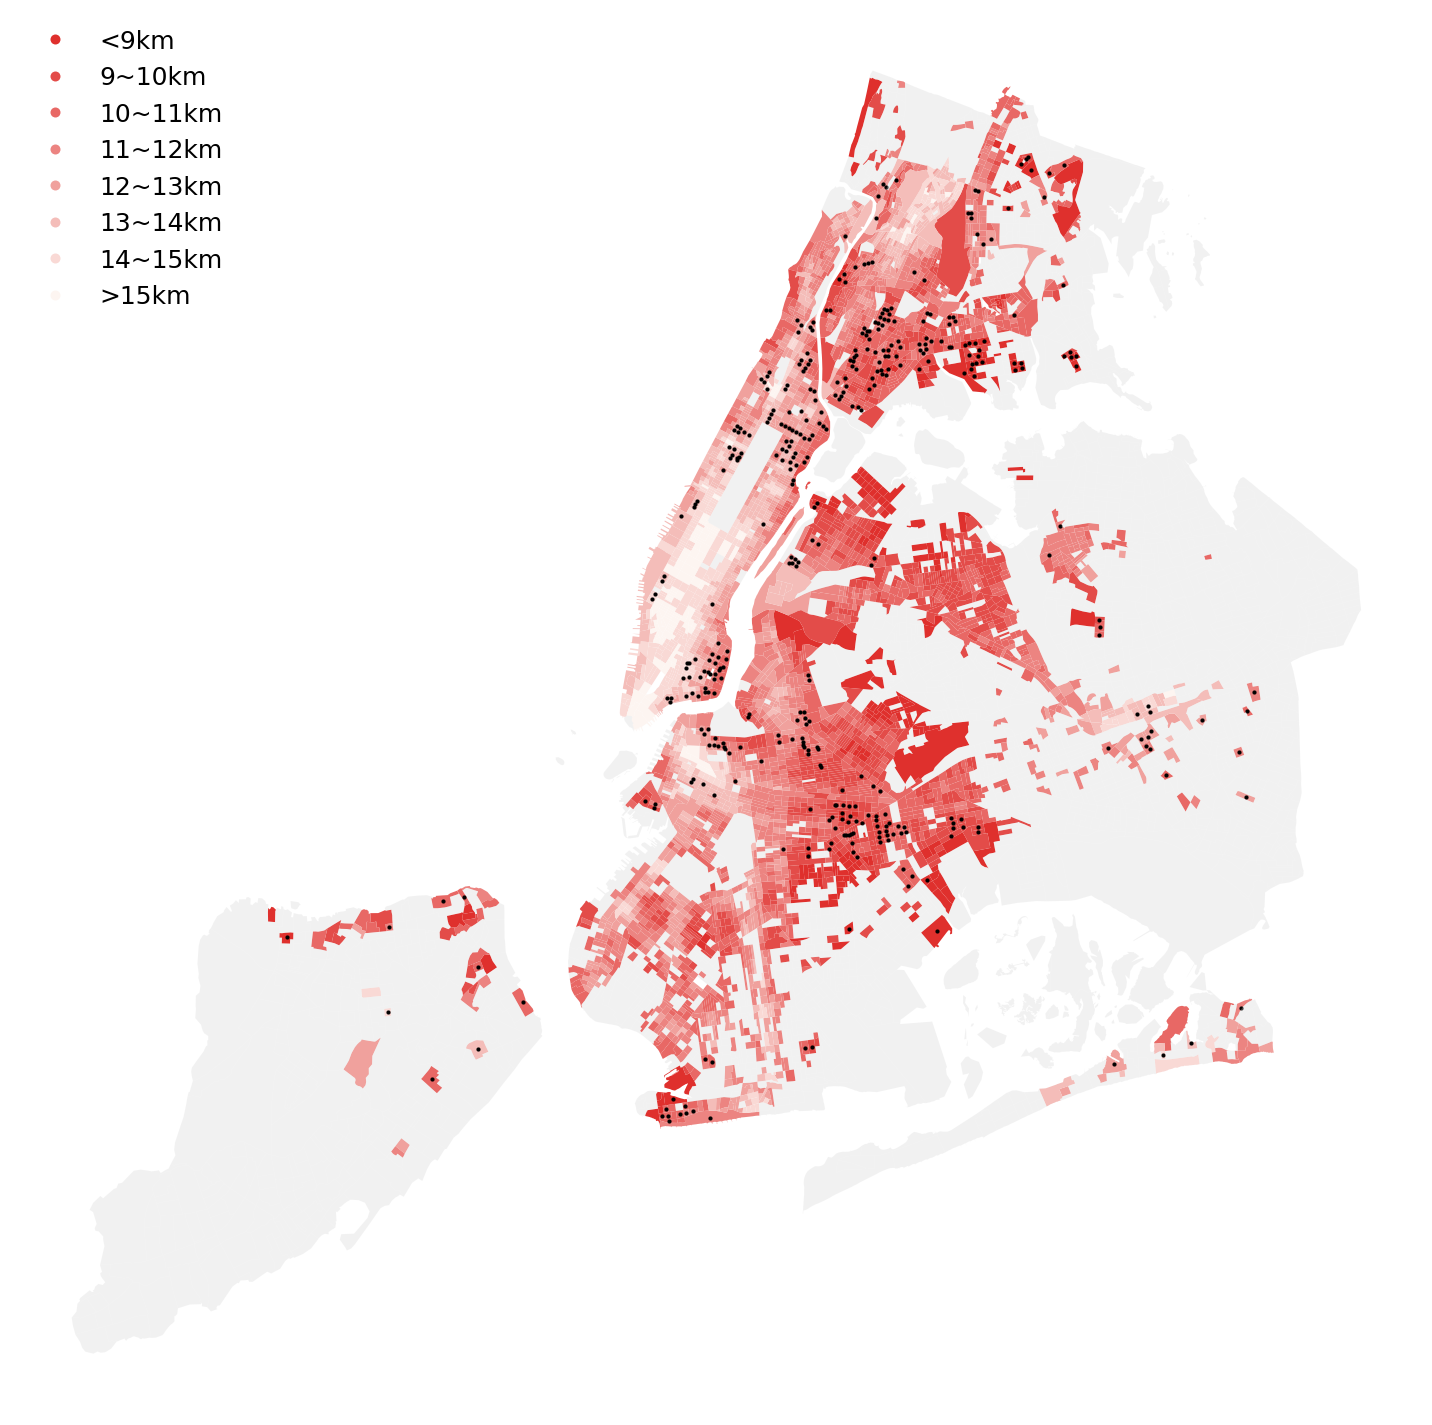

In [109]:
import matplotlib as mpl
mycmap = mpl.colors.LinearSegmentedColormap.from_list('lwide', [(0, '#DF302D'), (1, '#FDF5F1')], N=256)
# '#FBE3D5'
nycha_cbgs = [cbg for cbg in curr_gpd.census_block_group if public_housing_dist_dict.get(cbg, 10) < 1]
curr_gpd1 = pd.merge(curr_gpd.to_crs("EPSG:3857"), city_feats[['census_block_group', 'vehicle_rate', 'reach']], on = 'census_block_group', how = 'left')
curr_gpd1['ttime'] = pd.cut(curr_gpd1.reach, [0, 9, 10, 11, 12, 13, 14, 15, 10000], labels = ['<9km', '9~10km', '10~11km', '11~12km', '12~13km', '13~14km', '14~15km', '>15km'])
base = curr_gpd1.boundary.plot(figsize = (20, 20), lw = 0.0, color = 'black')
curr_gpd1[curr_gpd1.vehicle_rate <= 0.6].plot(ax = base, column = 'ttime', colormap = mycmap, legend = True, legend_kwds = {'frameon': False, 'loc': 'upper left', 'fontsize': 25})
curr_gpd1[(curr_gpd1.vehicle_rate <= 0.6) & (curr_gpd1.census_block_group.isin(nycha_cbgs))].centroid.plot(ax = base, color = 'black', markersize = 15)
nocars = curr_gpd1[curr_gpd1.vehicle_rate <= 0.6].census_block_group
curr_gpd1[~curr_gpd1.census_block_group.isin(nocars)].plot(ax = base, color = 'lightgrey', alpha = 0.3)
base.axis('off')
plt.tight_layout()
plt.show()